# Spotify songs popularity prediction
Using other features of the songs predict what might be the popularity of the song.

In [4]:
# importing needed EDA libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [5]:
import sklearn as sk

print(sk.__version__)

0.24.2


In [6]:
df = pd.read_csv("./data/data.csv")

In [7]:
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,60RFlt48hm0l4Fu0JoccOl,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020


In [8]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [10]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

## Data Information
According to the information given on Kaggle the data has following attributes:
The "data.csv" file contains more than 160,000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the data section.

### Primary:
    - id (Id of track generated by Spotify)
### Numerical:
    - acousticness (Ranges from 0 to 1)
    - danceability (Ranges from 0 to 1)
    - energy (Ranges from 0 to 1)
    - duration_ms (Integer typically ranging from 200k to 300k)
    - instrumentalness (Ranges from 0 to 1)
    - valence (Ranges from 0 to 1)
    - popularity (Ranges from 0 to 100)
    - tempo (Float typically ranging from 50 to 150)
    - liveness (Ranges from 0 to 1)
    - loudness (Float typically ranging from -60 to 0)
    - speechiness (Ranges from 0 to 1)
    - year (Ranges from 1921 to 2020)
### Dummy:
    - mode (0 = Minor, 1 = Major)
    - explicit (0 = No explicit content, 1 = Explicit content)
### Categorical:
    - key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
    - artists (List of artists mentioned)
    - release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
    - name (Name of the song)


In [11]:
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,60RFlt48hm0l4Fu0JoccOl,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020


In [12]:
df.info()
pd.isnull(df).any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

acousticness        False
artists             False
danceability        False
duration_ms         False
energy              False
explicit            False
id                  False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
name                False
popularity          False
release_date        False
speechiness         False
tempo               False
valence             False
year                False
dtype: bool

## EDA

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,169909.0,0.493214,0.376627,0.0,0.0945,0.492000,0.8880,0.996
danceability,169909.0,0.538150,0.175346,0.0,0.4170,0.548000,0.6670,0.988
duration_ms,169909.0,231406.158973,121321.923219,5108.0,171040.0000,208600.000000,262960.0000,5403500.000
energy,169909.0,0.488593,0.267390,0.0,0.2630,0.481000,0.7100,1.000
explicit,169909.0,0.084863,0.278679,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,169909.0,0.161937,0.309329,0.0,0.0000,0.000204,0.0868,1.000
key,169909.0,5.200519,3.515257,0.0,2.0000,5.000000,8.0000,11.000
liveness,169909.0,0.206690,0.176796,0.0,0.0984,0.135000,0.2630,1.000
loudness,169909.0,-11.370289,5.666765,-60.0,-14.4700,-10.474000,-7.1180,3.855
mode,169909.0,0.708556,0.454429,0.0,0.0000,1.000000,1.0000,1.000


1. Our target variable is **popularity** which is our dependent variable
2. Rest are independent variables, upon observation we can say that the data needs to be scaled and as data is both positive and negative we might use **PowerTransformer** from sklearn
3. We also observe that some independent variables like acousticness, loudness, tempo etc have many outliers too from the (Interquartile)IQR analysis.


In [14]:
# collecting the categorical columns
cat_cols = [cols for cols in df.columns if df[cols].dtypes == "O"]
cat_cols

['artists', 'id', 'name', 'release_date']

In [15]:
# collecting the integral data columns
int_cols = [cols for cols in df.columns if df[cols].dtypes == "int64"]
int_cols

['duration_ms', 'explicit', 'key', 'mode', 'popularity', 'year']

In [16]:
# collecting continuous data columns
float_cols = [cols for cols in df.columns if df[cols].dtypes == "float64"]
float_cols

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [34]:
df.corr() # pearson correlation coeficients

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
key,-0.021686,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064,0.012503
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084


### Experimental Scaling with MinMax Scaler

In [17]:
scaler = MinMaxScaler(feature_range=[-1, 1], clip=True)

In [18]:
scaled_data_float = scaler.fit_transform(df[float_cols], y=df.popularity)
scaled_data_float

array([[ 0.99799197,  0.43319838, -0.61      , ..., -0.89556244,
        -0.02930464,  0.558     ],
       [ 0.99598394, -0.23279352, -0.973     , ..., -0.90464396,
        -0.31196152, -0.8466    ],
       [ 0.21285141,  0.51619433, -0.56      , ...,  0.91744066,
        -0.12182752,  0.76      ],
       ...,
       [ 0.08032129,  0.04048583,  0.078     , ..., -0.78328173,
         0.01355642, -0.694     ],
       [-0.85662651,  0.30769231,  0.522     , ..., -0.92053664,
         0.06448824, -0.056     ],
       [-0.7811245 ,  0.03643725, -0.144     , ..., -0.94406605,
        -0.33968889, -0.268     ]])

In [19]:
scaled_data_int = scaler.fit_transform(X=df[int_cols], y=df.popularity)
scaled_data_int

array([[-0.94311639, -1.        ,  0.81818182,  1.        , -1.        ,
        -0.85858586],
       [-0.89736759, -1.        ,  0.45454545,  1.        , -1.        ,
        -0.85858586],
       [-0.96325128, -1.        , -0.09090909, -1.        , -1.        ,
        -0.85858586],
       ...,
       [-0.93494655, -1.        ,  0.27272727,  1.        ,  0.4       ,
         1.        ],
       [-0.93990803, -1.        , -0.81818182,  1.        ,  0.4       ,
         1.        ],
       [-0.92231798, -1.        , -1.        ,  1.        ,  0.3       ,
         1.        ]])

In [20]:
scaled_data_float.min(), scaled_data_float.max()

(-1.0, 1.0)

In [21]:
scaled_data_int.min(), scaled_data_int.max()

(-1.0, 1.0)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

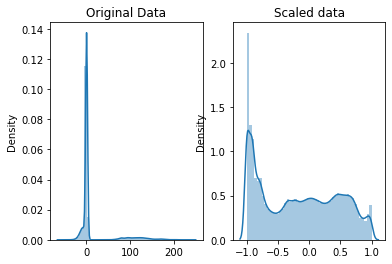

In [22]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df[float_cols], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data_float, ax=ax[1])
ax[1].set_title("Scaled data")

In [23]:
scaled_data_int = pd.DataFrame(
    scaler.fit_transform(df[int_cols], y=df.popularity), columns=int_cols
)
scaled_data_int

,duration_ms,explicit,key,mode,popularity,year
0,-0.943116,-1.0,0.818182,1.0,-1.00,-0.858586
1,-0.897368,-1.0,0.454545,1.0,-1.00,-0.858586
2,-0.963251,-1.0,-0.090909,-1.0,-1.00,-0.858586
3,-0.934924,-1.0,-0.818182,-1.0,-1.00,-0.858586
4,-0.747101,-1.0,1.000000,1.0,-0.98,-0.858586
...,...,...,...,...,...,...
169904,-0.941208,1.0,-0.818182,1.0,0.50,1.000000
169905,-0.939849,-1.0,0.454545,1.0,0.28,1.000000
169906,-0.934947,-1.0,0.272727,1.0,0.40,1.000000
169907,-0.939908,-1.0,-0.818182,1.0,0.40,1.000000


In [24]:
scaled_data_float = pd.DataFrame(
    scaler.fit_transform(df[float_cols], y=df.popularity), columns=float_cols
)
scaled_data_float.sort_values(by="acousticness")

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
48566,-1.0,-1.000000,-1.000000,-1.000,-1.0000,-1.000000,-1.000000,-1.000000,-1.0000
59966,-1.0,-0.402834,0.888000,0.080,-0.8186,0.625902,-0.830341,-0.093674,-0.4800
135129,-1.0,-1.000000,-0.999960,-1.000,-1.0000,0.385138,-1.000000,-1.000000,-1.0000
150900,-1.0,-0.730769,-1.000000,-1.000,-1.0000,-0.365844,-1.000000,0.147474,-1.0000
106728,-1.0,-1.000000,-0.998362,0.636,-0.0940,0.234359,-1.000000,-1.000000,-1.0000
...,...,...,...,...,...,...,...,...,...
17059,1.0,-0.265182,-0.330000,0.840,-0.5340,0.492632,-0.775026,-0.447018,0.7420
99104,1.0,-0.040486,-0.734000,-0.882,-0.7820,0.401895,-0.892260,0.384123,-0.5000
99108,1.0,0.261134,-0.578000,-0.002,-0.4600,0.439731,-0.886687,-0.072584,-0.2840
98734,1.0,0.321862,-0.584000,0.402,-0.6260,0.350716,-0.110423,-0.032549,0.4780


In [25]:
def compare_via_graphs(df, columns, scaled_data):
    for cols in columns:
        plt.figure(figsize=(20, 5))

        plt.subplot(131)
        sns.kdeplot(df[cols], color="g", shade=True)
        plt.title(cols + " Distribution")

        plt.subplot(132)
        sns.kdeplot(scaled_data[cols], color="b", shade=True)
        plt.title(cols + " Distribution after scaling")

        plt.subplot(133)
        sns.boxplot(y=scaled_data[cols], color="pink")
        plt.title(cols + " Boxplot")

        plt.show()

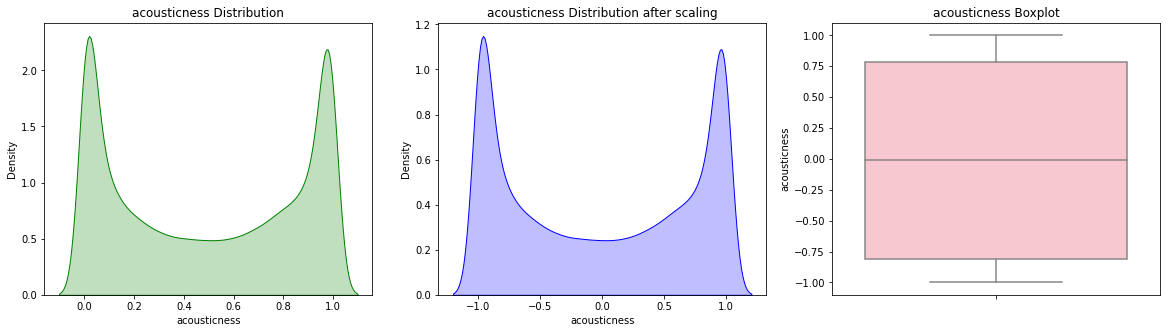

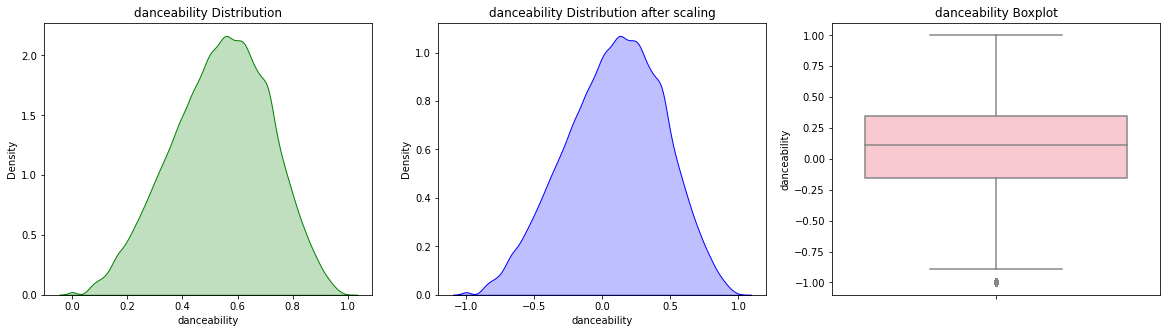

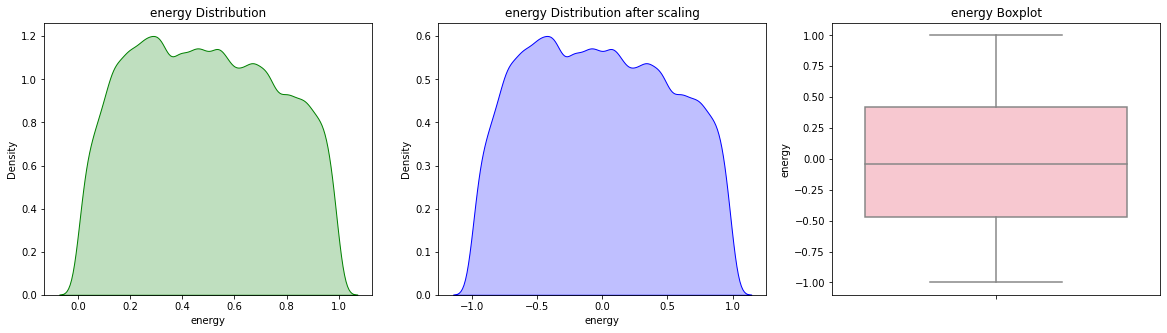

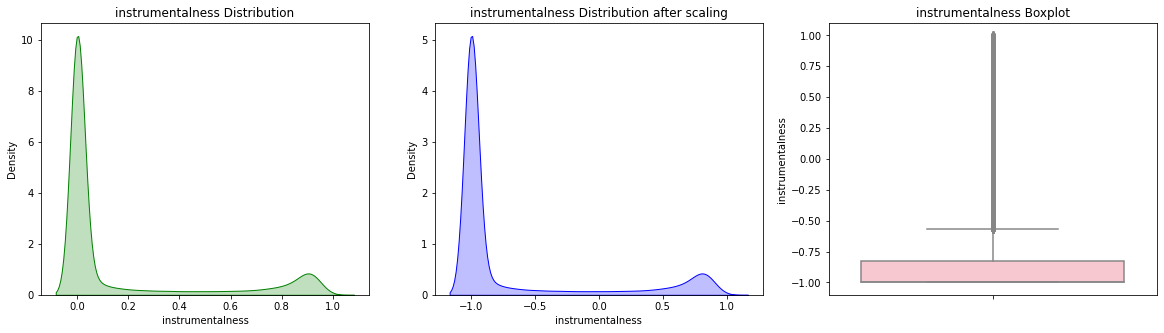

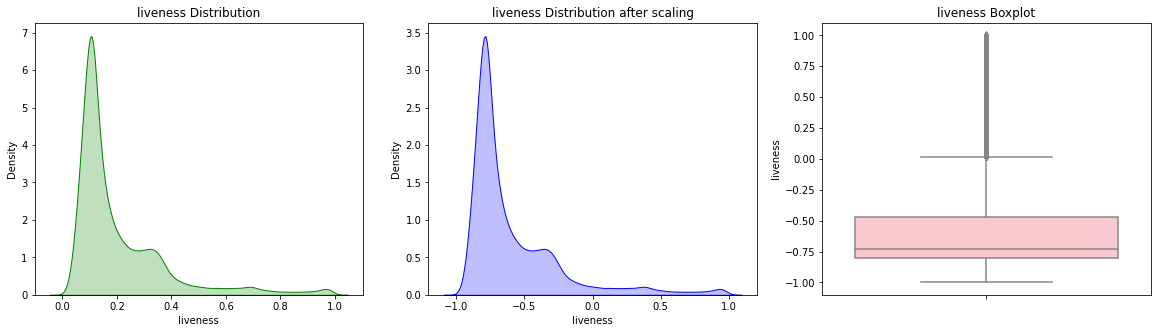

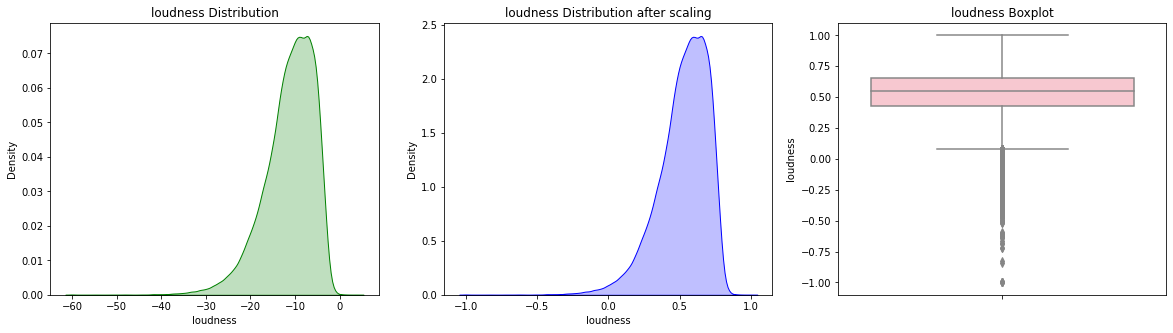

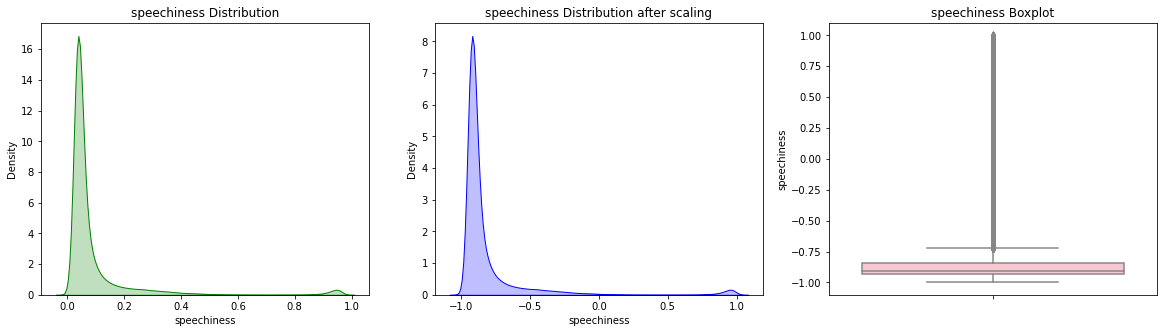

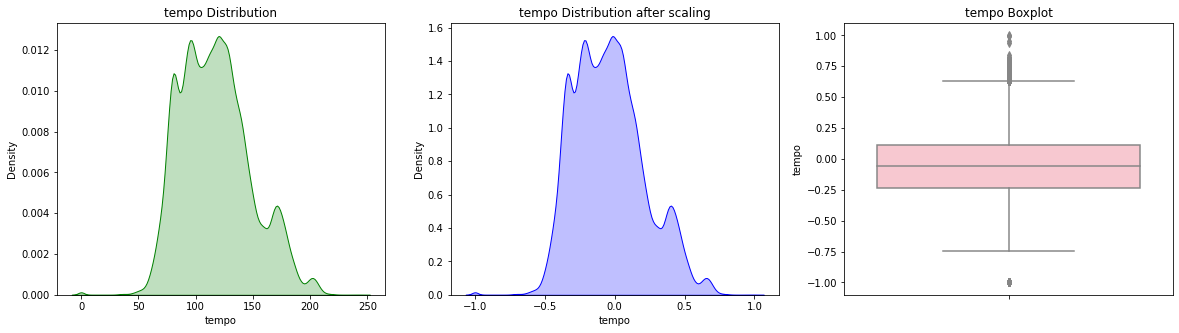

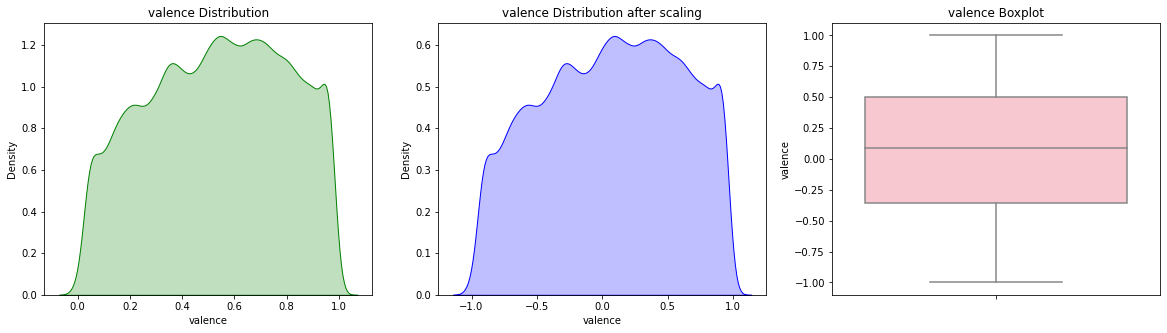

In [62]:
compare_via_graphs(df, float_cols, scaled_data_float)

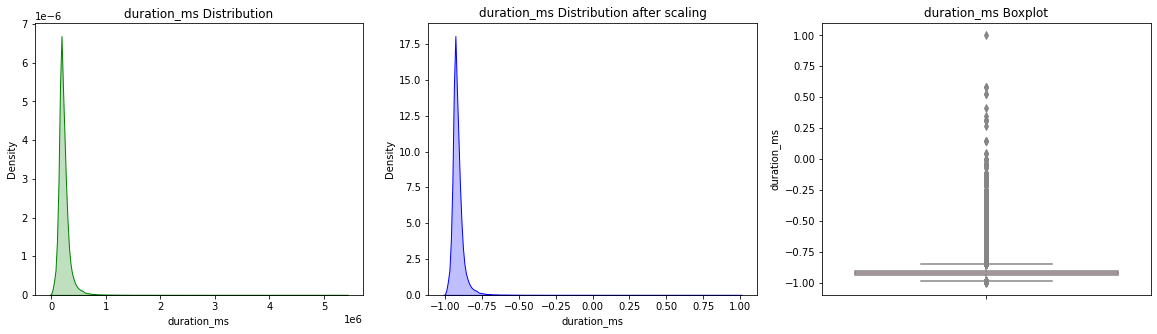

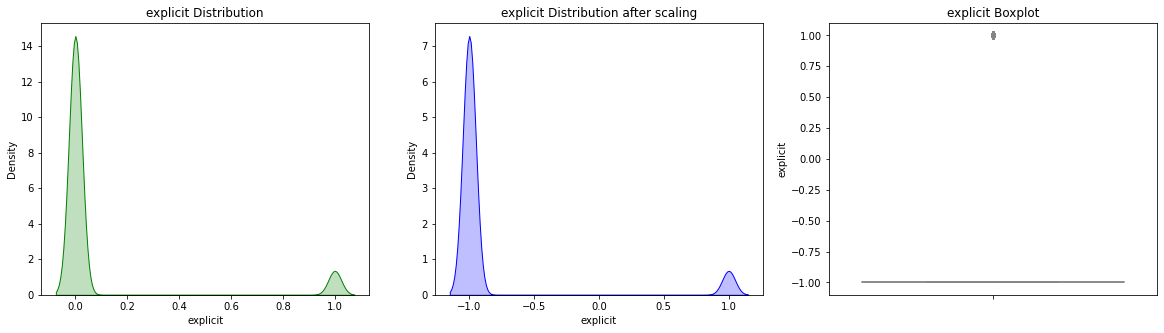

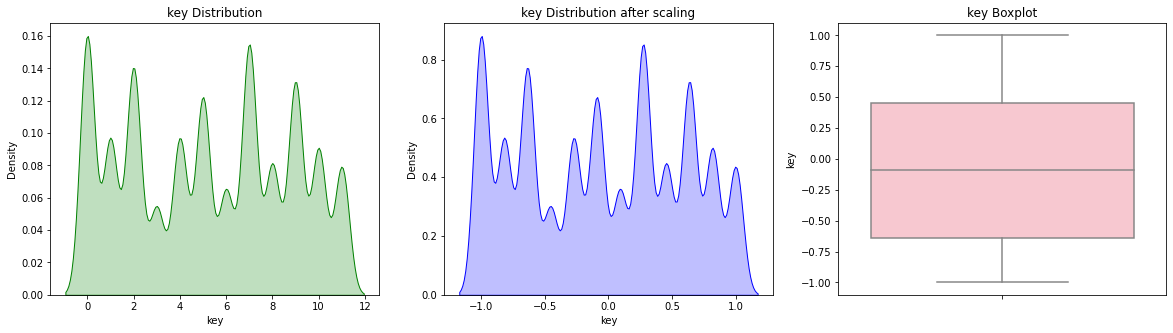

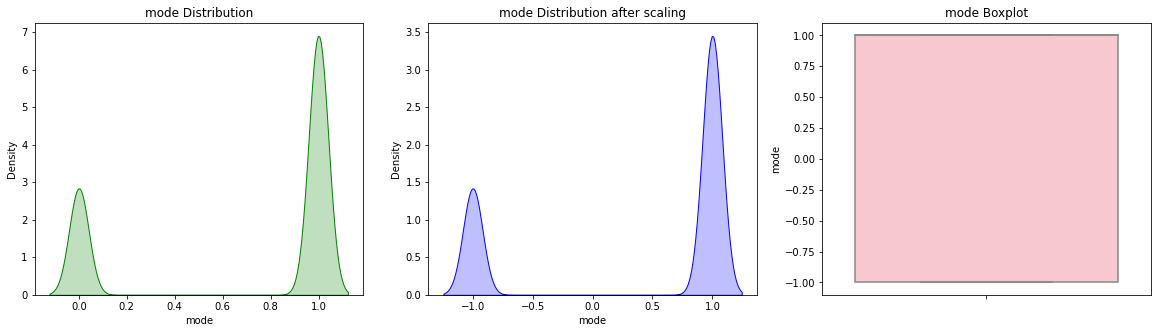

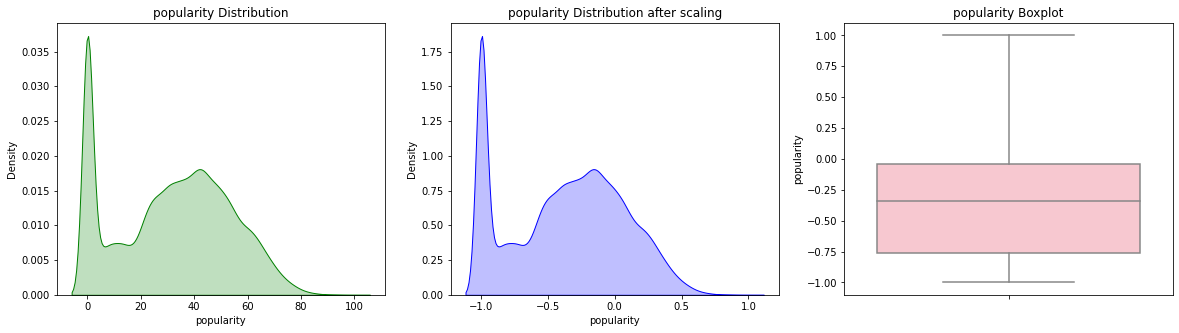

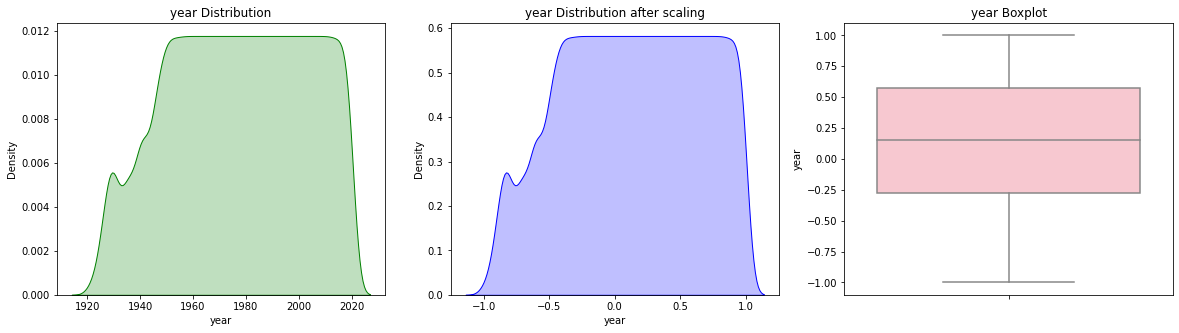

In [63]:
compare_via_graphs(df, int_cols, scaled_data_int)

### Scaling with PowerTransformer


In [26]:
pt = PowerTransformer(method="yeo-johnson", standardize=True)

In [29]:
scaled_pt_float = pd.DataFrame(pt.fit_transform(df[float_cols]), columns=float_cols)
scaled_pt_int = pd.DataFrame(pt.fit_transform(df[int_cols]), columns=int_cols)

In [30]:
scaled_pt_float.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,1.284455,0.973805,-1.106425,1.812808,-0.052100,-0.359097,-0.164144,0.101307,0.941482
1,1.282194,-0.921882,-1.882441,1.889861,-1.108851,-2.292763,-0.317419,-1.088774,-1.703614
2,0.351054,1.228984,-1.003927,-0.630486,-0.445473,-1.410000,2.212289,-0.271135,1.341203
3,1.284455,1.430989,-1.377647,1.888500,-0.556555,-0.722918,0.886779,-0.243385,0.709991
4,1.273145,-1.786448,-1.069413,1.890511,-0.749366,-1.018925,-0.458290,-1.943365,-1.730028


In [31]:
scaled_pt_int.head()

,duration_ms,explicit,key,mode,popularity,year
0,-0.695583,-0.30452,1.271264,0.641344,-1.672833,-1.835824
1,0.688576,-0.30452,0.810730,0.641344,-1.672833,-1.835824
2,-1.684612,-0.30452,0.050843,-1.559227,-1.672833,-1.835824
3,-0.384577,-0.30452,-1.212019,-1.559227,-1.672833,-1.835824
4,2.893131,-0.30452,1.491217,0.641344,-1.549305,-1.835824


In [1]:
# compare_via_graphs(df, float_cols, scaled_pt_float)

In [2]:
# compare_via_graphs(df, int_cols, scaled_pt_int)

In [66]:
pt.lambdas_

array([  0.03900192, -16.99873892,   0.67624936,   4.06300417,
         0.63896818,   6.58179881])